# Q1. What is the mathematical formula for a linear SVM?

Mathematical Formula for a Linear SVM
The decision boundary of a linear SVM is represented by the equation:

w^T * x + b = 0
Where:

w is the weight vector, perpendicular to the decision boundary.
x is the input feature vector.
b is the bias term, determining the offset of the hyperplane from the origin.
The objective of SVM is to find the optimal values of w and b that maximize the margin between the two classes.   

The optimization problem can be formulated as:

Minimize: 1/2 * ||w||^2
Subject to: yi * (w^T * xi + b) >= 1, for all i
Where:

||w|| is the Euclidean norm (length) of the weight vector.
yi is the class label of the i-th data point (either +1 or -1).
xi is the i-th feature vector.

# Q2. What is the objective function of a linear SVM?

Objective Function of a Linear SVM
The objective function of a linear SVM is to maximize the margin between the two classes while minimizing classification errors.   

Mathematically, it can be expressed as:

Minimize: 1/2 * ||w||^2
Subject to: yi * (w^T * xi + b) >= 1, for all i
Where:

||w|| is the Euclidean norm (length) of the weight vector.
w is the weight vector, perpendicular to the decision boundary.
b is the bias term, determining the offset of the hyperplane from the origin.
yi is the class label of the i-th data point (either +1 or -1).
xi is the i-th feature vector.
Breakdown:
Minimize 1/2 * ||w||^2: This term aims to minimize the length of the weight vector w. A smaller w corresponds to a larger margin between the decision boundary and the closest data points (support vectors).
Subject to: yi * (w^T * xi + b) >= 1: These constraints ensure that all data points are correctly classified with a margin of at least 1.
By solving this optimization problem, we find the optimal hyperplane that separates the data points with the maximum margin.

# Q3. What is the kernel trick in SVM?

The Kernel Trick in SVM

The kernel trick is a mathematical technique that allows SVM to efficiently handle high-dimensional data without explicitly computing the mapping to that high-dimensional space.   

Understanding the Challenge

Often, real-world data is not linearly separable. To address this, SVMs can project the data into a higher-dimensional space where it might become linearly separable. However, explicitly computing this mapping can be computationally expensive, especially for high-dimensional data.   

The Kernel Solution

The kernel trick elegantly solves this problem. Instead of computing the mapping to the high-dimensional space, it directly computes the dot product of the mapped data points in the original space. This dot product is equivalent to a kernel function applied to the original data points.   

Key points about the kernel trick:

Implicit mapping: It avoids the explicit calculation of the mapping function.   

Computational efficiency: It's computationally efficient compared to explicitly computing the mapping.   
Non-linearity: It allows SVM to handle non-linearly separable data.   
Kernel functions: There are various kernel functions (e.g., linear, polynomial, RBF) that can be used to capture different types of relationships in the data.   
Example Kernel Functions
Linear kernel: K(x, y) = x^T * y
Polynomial kernel: K(x, y) = (γ * x^T * y + r)^d
Radial Basis Function (RBF) kernel: K(x, y) = exp(-γ * ||x - y||^2)
By using kernel functions, SVM can effectively handle complex patterns in data without the computational burden of explicit mapping.

# Q4. What is the role of support vectors in SVM Explain with example

Role of Support Vectors in SVM

Support vectors are the data points that lie closest to the decision boundary (hyperplane) in an SVM. They are crucial in determining the position and orientation of the hyperplane.

Key role of support vectors:
    
    
Define the decision boundary:
    
    The hyperplane is constructed in such a way that it maximizes the distance between itself and the nearest data points (support vectors) from each class.
Influence the model: 
    Only the support vectors are used to construct the decision boundary. Other data points have no impact on the model.
Efficiency: 
    Because only support vectors are crucial, SVM models can be computationally efficient, especially with large datasets.
Generalization: 
    By focusing on the support vectors, SVM often leads to better generalization performance compared to other models.

Example:

Imagine you have a dataset of red and blue dots, and you want to find a line that best separates them. The support vectors would be the red and blue dots that are closest to the optimal separating line. The line is determined by these points, and moving any other points away from the line would not affect its position.

# Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?

1. Hyperplane

The hyperplane is the decision boundary that separates the data points of different classes. In a 2-dimensional space, it is a line, while in a 3-dimensional space, it is a plane. In higher dimensions, it is called a hyperplane.

2. Marginal Plane

Marginal planes are parallel to the hyperplane and are positioned at the boundary of the margin. They are equidistant from the hyperplane and pass through the support vectors, which are the closest points from each class to the hyperplane.

3. Hard Margin

A hard margin SVM is used when the data is perfectly linearly separable. It finds the hyperplane that maximizes the margin while ensuring that all data points are correctly classified. No data points are allowed within the margin.

4. Soft Margin

A soft margin SVM is used when the data is not perfectly linearly separable. It allows some misclassifications by introducing slack variables, which permit some data points to be within the margin or even on the wrong side of the hyperplane. The goal is to find a balance between maximizing the margin and minimizing classification errors.

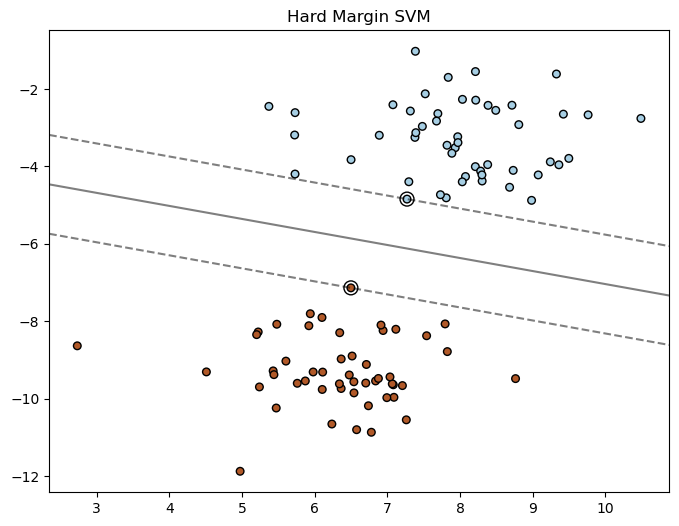

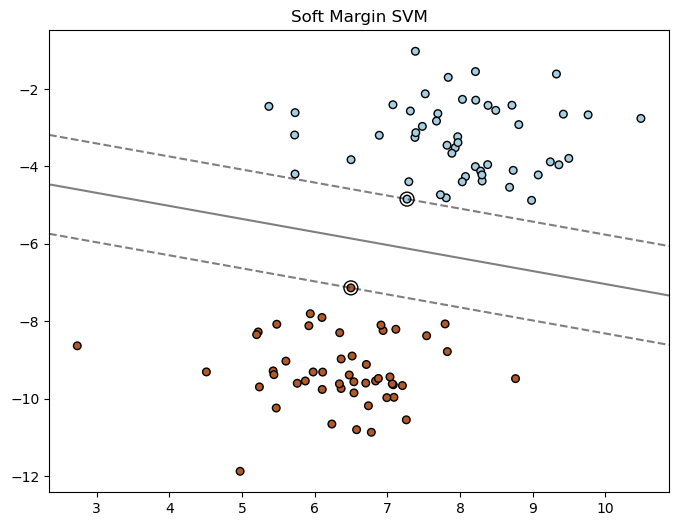

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Generate a simple 2D dataset
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)
y = np.where(y == 0, -1, 1)  # Convert to -1 and 1 for SVM

# Fit the SVM model with a linear kernel (Hard Margin)
svm_hard = SVC(kernel='linear', C=1e10)  # Large C for hard margin
svm_hard.fit(X, y)

# Fit the SVM model with a linear kernel (Soft Margin)
svm_soft = SVC(kernel='linear', C=1.0)  # Default C for soft margin
svm_soft.fit(X, y)

# Function to plot SVM decision boundary and margins
def plot_svm_decision_boundary(model, X, y, title):
    plt.figure(figsize=(8, 6))
    
    # Plot the data points and color them by their class
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired, edgecolors='k')

    # Plot the decision boundary and margins
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 50)
    yy = np.linspace(ylim[0], ylim[1], 50)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # Highlight the support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

    plt.title(title)
    plt.show()

# Plot Hard Margin SVM
plot_svm_decision_boundary(svm_hard, X, y, "Hard Margin SVM")

# Plot Soft Margin SVM
plot_svm_decision_boundary(svm_soft, X, y, "Soft Margin SVM")


# Load the iris dataset from the scikit-learn library and split it into a training set and a testing set.

# Train a linear SVM classifier on the training set and predict the labels for the testing set.

# Compute the accuracy of the model on the testing set.

# Plot the decision boundaries of the trained model using two of the features.

# Try different values of the regularisation parameter C and see how it affects the performance of the model.

Accuracy: 0.80


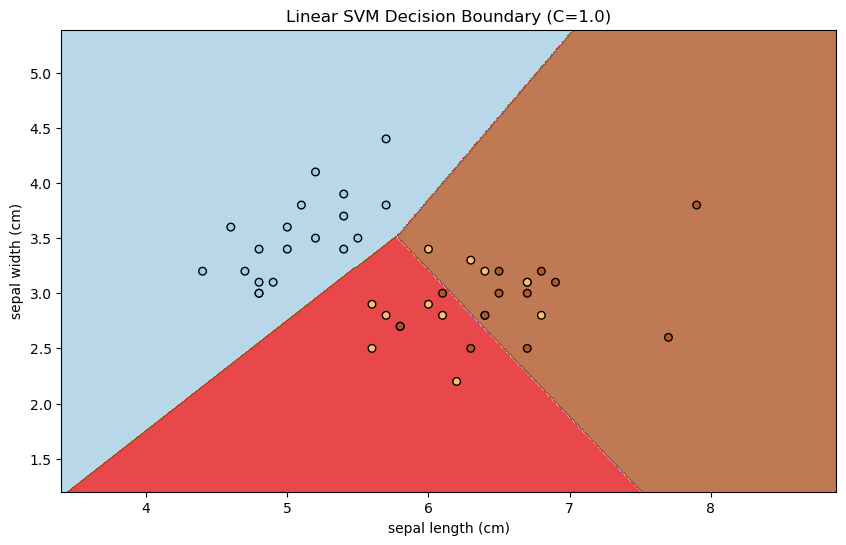

Accuracy with C=0.01: 0.40


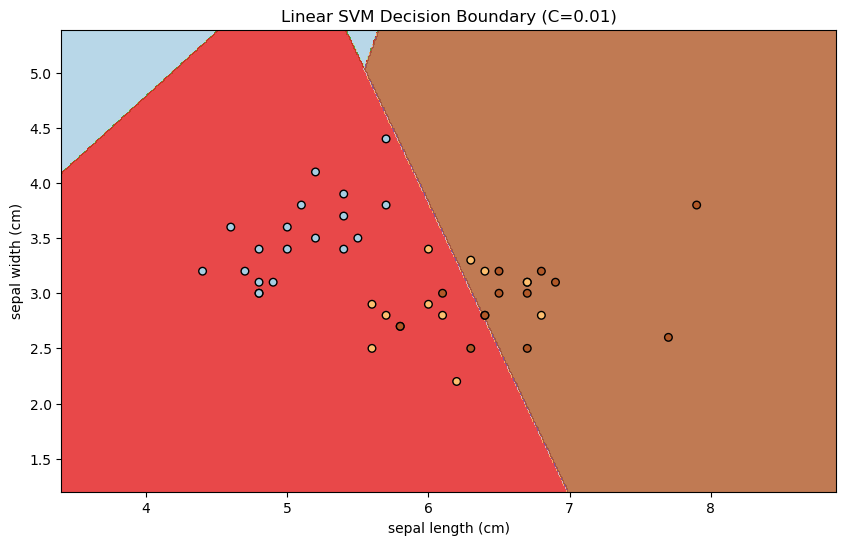

Accuracy with C=0.1: 0.82


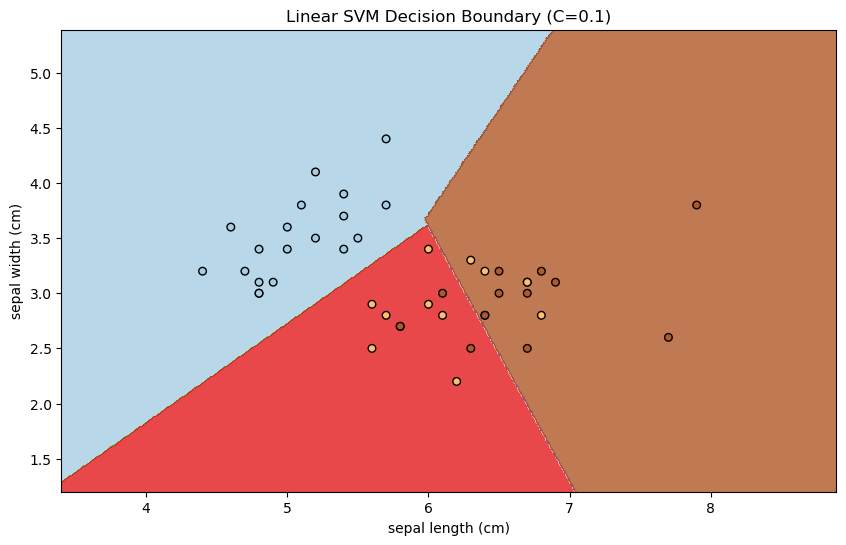

Accuracy with C=1.0: 0.80


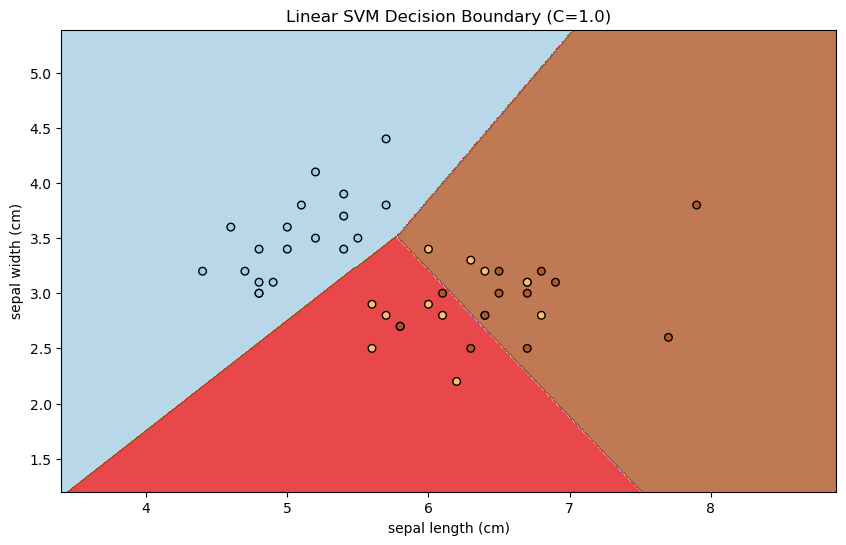

Accuracy with C=10.0: 0.80


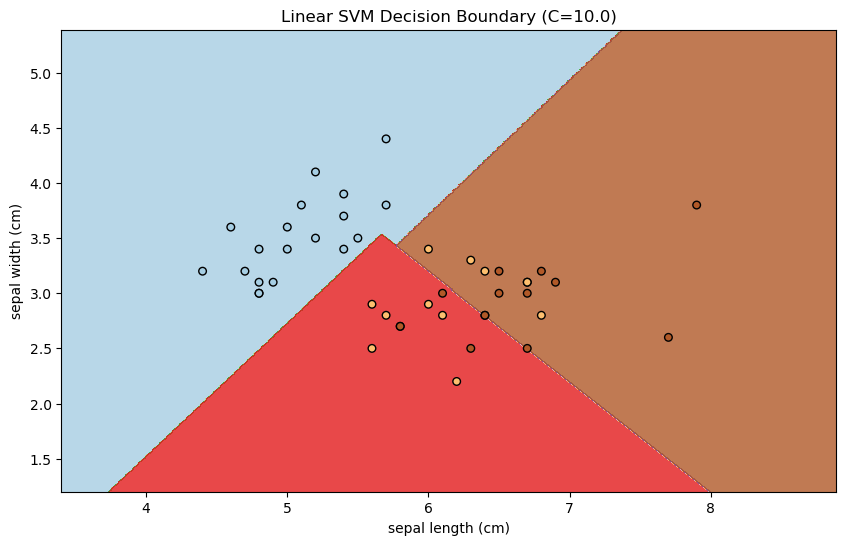

Accuracy with C=100.0: 0.80


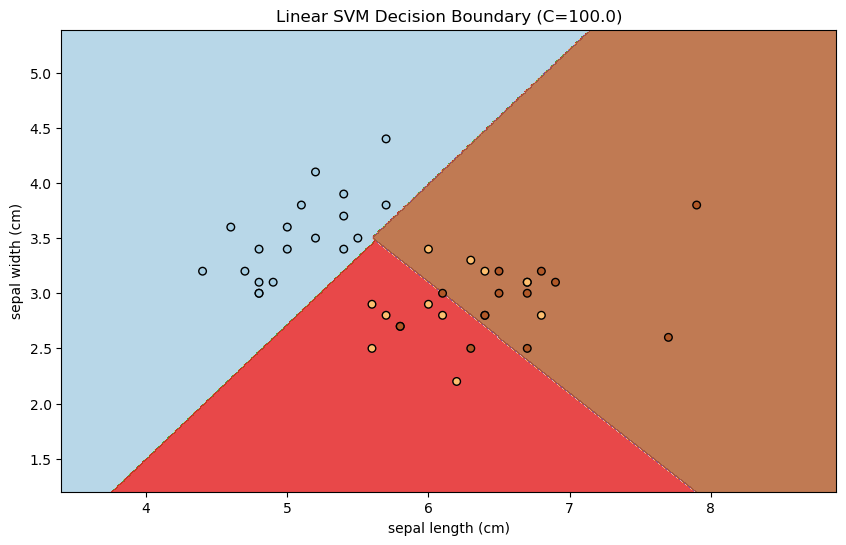

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features for easy visualization
y = iris.target

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to plot SVM decision boundary
def plot_decision_boundary(model, X, y, title):
    # Create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.show()

# Train a linear SVM classifier with a default value of C
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = model.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot decision boundaries for C=1.0
plot_decision_boundary(model, X_test, y_test, "Linear SVM Decision Boundary (C=1.0)")

# Test different values of C and plot their decision boundaries
C_values = [0.01, 0.1, 1.0, 10.0, 100.0]
for C in C_values:
    model = SVC(kernel='linear', C=C)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with C={C}: {accuracy:.2f}")
    plot_decision_boundary(model, X_test, y_test, f"Linear SVM Decision Boundary (C={C})")
